In [1]:
import pandas as pd
import requests
from io import StringIO

# Updated URL to the raw CSV file
url = 'https://raw.githubusercontent.com/yamanalab/ec-darkpattern/master/dataset/dataset.tsv'
response = requests.get(url)
data = StringIO(response.text)

# Assuming the delimiter in your CSV file is a tab, use '\t'
df = pd.read_csv(data, sep='\t')

# Now df contains your DataFrame with the data from the CSV file

In [2]:
df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
2351,1304,Bra Panty Set,0,Not Dark Pattern
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern
2353,1081,Only 4 left in stock,1,Scarcity
2354,767,Trending Players,0,Not Dark Pattern


In [3]:
df.info

<bound method DataFrame.info of       page_id                                               text  label  \
0        1012            FLASH SALE | LIMITED TIME ONLY Shop Now      1   
1         158                                Pillowcases & Shams      0   
2         108                                     Write a review      0   
3        1425  To start your return, simply click on the foll...      0   
4        1658                newsletter signup (privacy policy)       0   
...       ...                                                ...    ...   
2351     1304                                     Bra Panty Set       0   
2352     1038  DressesFootwearHatsHoodies & SweatshirtsJersey...      0   
2353     1081                               Only 4 left in stock      1   
2354      767                                   Trending Players      0   
2355     1468                                   10 Left in stock      1   

      Pattern Category  
0              Urgency  
1     Not Dark Pa

In [4]:
df.isnull().sum()

page_id             0
text                0
label               0
Pattern Category    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

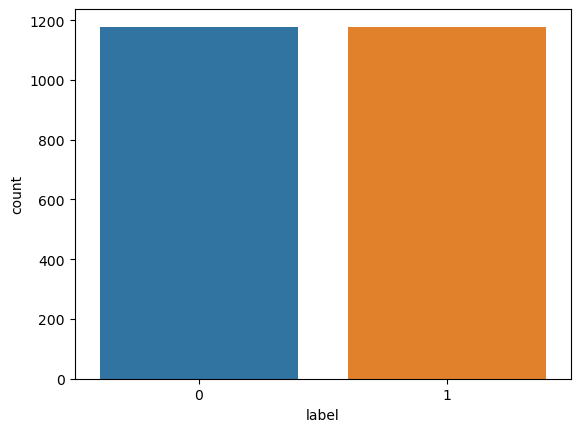

In [5]:
import seaborn as sns
sns.countplot(x = 'label', data = df)

In [6]:
for column in df.columns:
    if df[column].dtype == 'O':  # Note the correct dtype check for object (string) columns
        df[column] = df[column].str.lower()


In [7]:
df

,page_id,text,label,Pattern Category
0,1012,flash sale | limited time only shop now,1,urgency
1,158,pillowcases & shams,0,not dark pattern
2,108,write a review,0,not dark pattern
3,1425,"to start your return, simply click on the foll...",0,not dark pattern
4,1658,newsletter signup (privacy policy),0,not dark pattern
...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern
2352,1038,dressesfootwearhatshoodies & sweatshirtsjersey...,0,not dark pattern
2353,1081,only 4 left in stock,1,scarcity
2354,767,trending players,0,not dark pattern


In [8]:
import string
string.punctuation
def remove_punc(text):
  exclude = string.punctuation
  if isinstance(text,str):
    return text.translate(str.maketrans('', '', exclude))
  else:
    return str(text)

df['text'] = df['text'].apply(remove_punc)

In [9]:
df

,page_id,text,label,Pattern Category
0,1012,flash sale limited time only shop now,1,urgency
1,158,pillowcases shams,0,not dark pattern
2,108,write a review,0,not dark pattern
3,1425,to start your return simply click on the follo...,0,not dark pattern
4,1658,newsletter signup privacy policy,0,not dark pattern
...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern
2352,1038,dressesfootwearhatshoodies sweatshirtsjerseys...,0,not dark pattern
2353,1081,only 4 left in stock,1,scarcity
2354,767,trending players,0,not dark pattern


In [10]:
import re
def remove_emoji(text):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1F0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r'',text)

In [11]:
df['text'] = df['text'].apply(remove_emoji)

In [12]:
df

,page_id,text,label,Pattern Category
0,1012,flash sale limited time only shop now,1,urgency
1,158,pillowcases shams,0,not dark pattern
2,108,write a review,0,not dark pattern
3,1425,to start your return simply click on the follo...,0,not dark pattern
4,1658,newsletter signup privacy policy,0,not dark pattern
...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern
2352,1038,dressesfootwearhatshoodies sweatshirtsjerseys...,0,not dark pattern
2353,1081,only 4 left in stock,1,scarcity
2354,767,trending players,0,not dark pattern


In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df['text'] = df['text'].apply(str)
df['text_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['text_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [15]:
df

,page_id,text,label,Pattern Category,text_words,text_sentences
0,1012,flash sale limited time only shop now,1,urgency,7,1
1,158,pillowcases shams,0,not dark pattern,2,1
2,108,write a review,0,not dark pattern,3,1
3,1425,to start your return simply click on the follo...,0,not dark pattern,37,1
4,1658,newsletter signup privacy policy,0,not dark pattern,4,1
...,...,...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern,3,1
2352,1038,dressesfootwearhatshoodies sweatshirtsjerseys...,0,not dark pattern,7,1
2353,1081,only 4 left in stock,1,scarcity,5,1
2354,767,trending players,0,not dark pattern,2,1


In [16]:
df['Pattern Category'] = df['Pattern Category'].astype(str)
df['Pattern Category_num_characters'] = df['Pattern Category'].apply(len)
df['Pattern Category_num_words'] = df['Pattern Category'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Pattern Category_num_sentences'] = df['Pattern Category'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df

,page_id,text,label,Pattern Category,text_words,text_sentences,Pattern Category_num_characters,Pattern Category_num_words,Pattern Category_num_sentences
0,1012,flash sale limited time only shop now,1,urgency,7,1,7,1,1
1,158,pillowcases shams,0,not dark pattern,2,1,16,3,1
2,108,write a review,0,not dark pattern,3,1,16,3,1
3,1425,to start your return simply click on the follo...,0,not dark pattern,37,1,16,3,1
4,1658,newsletter signup privacy policy,0,not dark pattern,4,1,16,3,1
...,...,...,...,...,...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern,3,1,16,3,1
2352,1038,dressesfootwearhatshoodies sweatshirtsjerseys...,0,not dark pattern,7,1,16,3,1
2353,1081,only 4 left in stock,1,scarcity,5,1,8,1,1
2354,767,trending players,0,not dark pattern,2,1,16,3,1


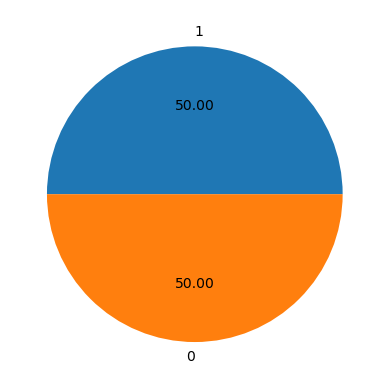

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels = ['1','0'], autopct = "%0.2f")
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

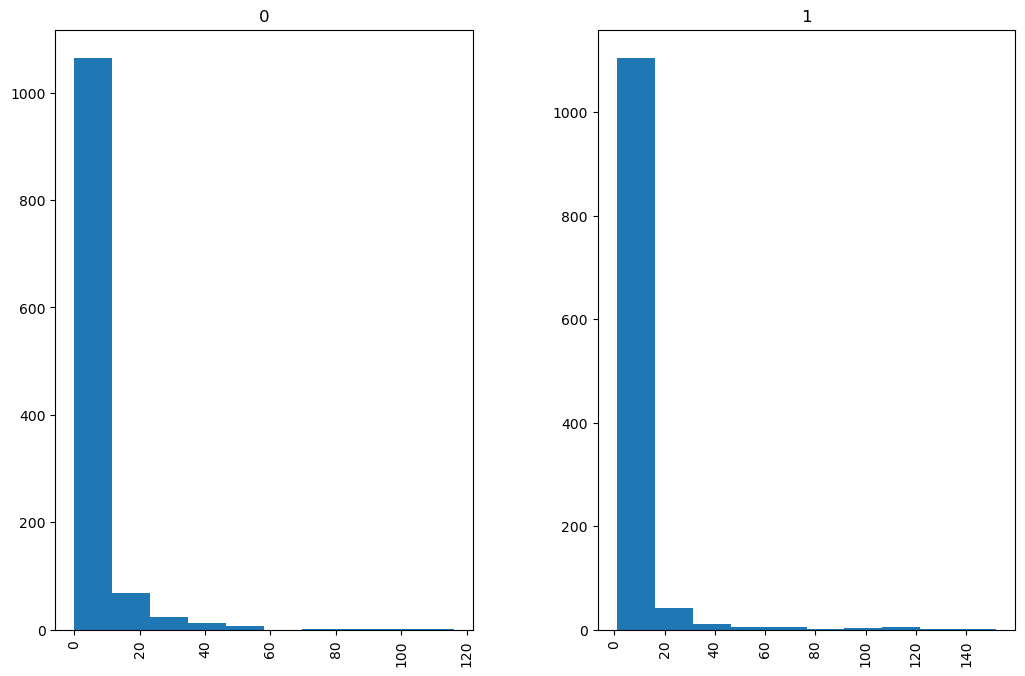

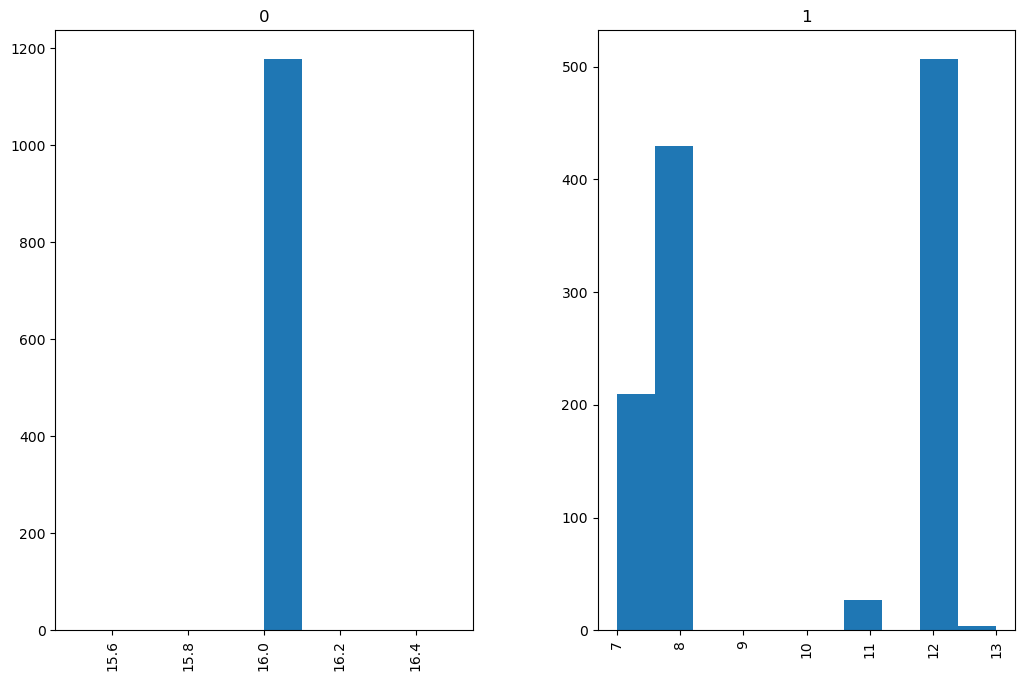

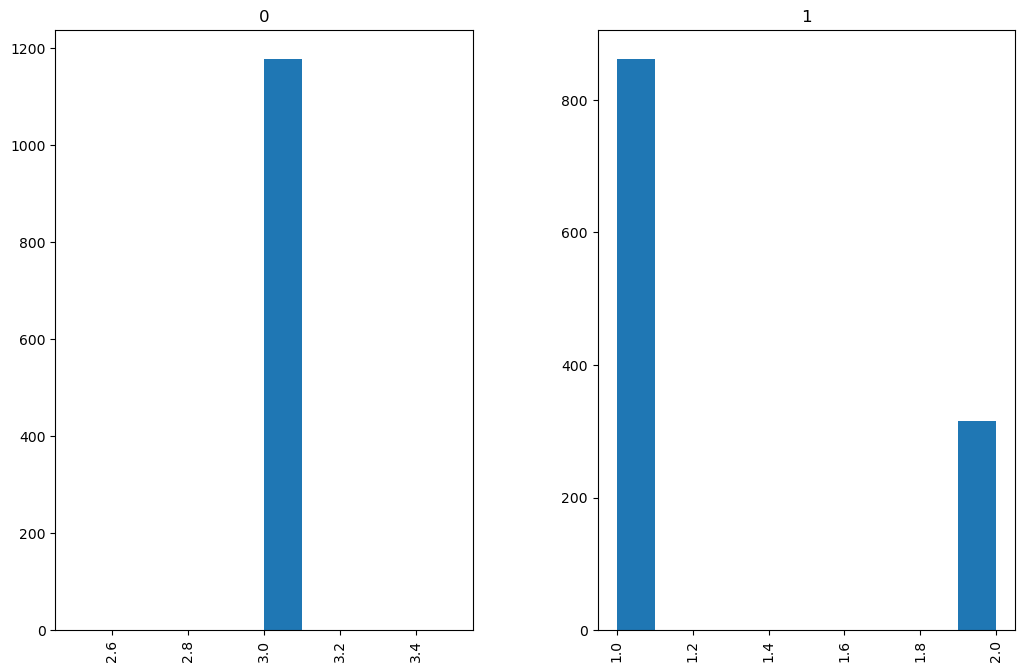

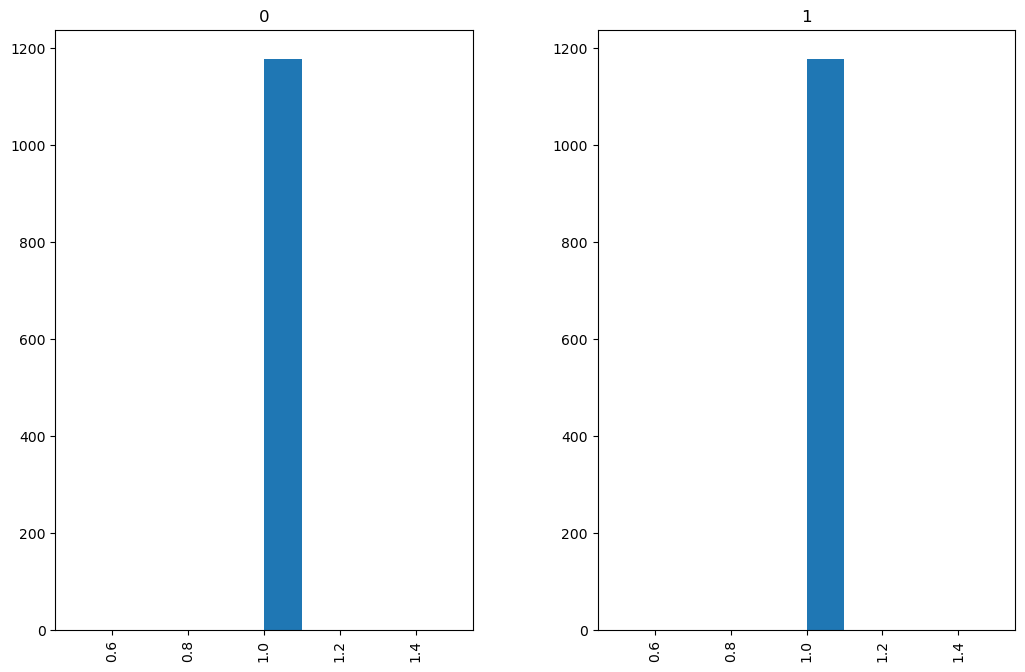

In [19]:
df.hist(column='text_words',by='label',figsize=(12,8))
df.hist(column='Pattern Category_num_characters',by='label',figsize=(12,8))
df.hist(column='Pattern Category_num_words',by='label',figsize=(12,8))
df.hist(column='Pattern Category_num_sentences',by='label',figsize=(12,8))

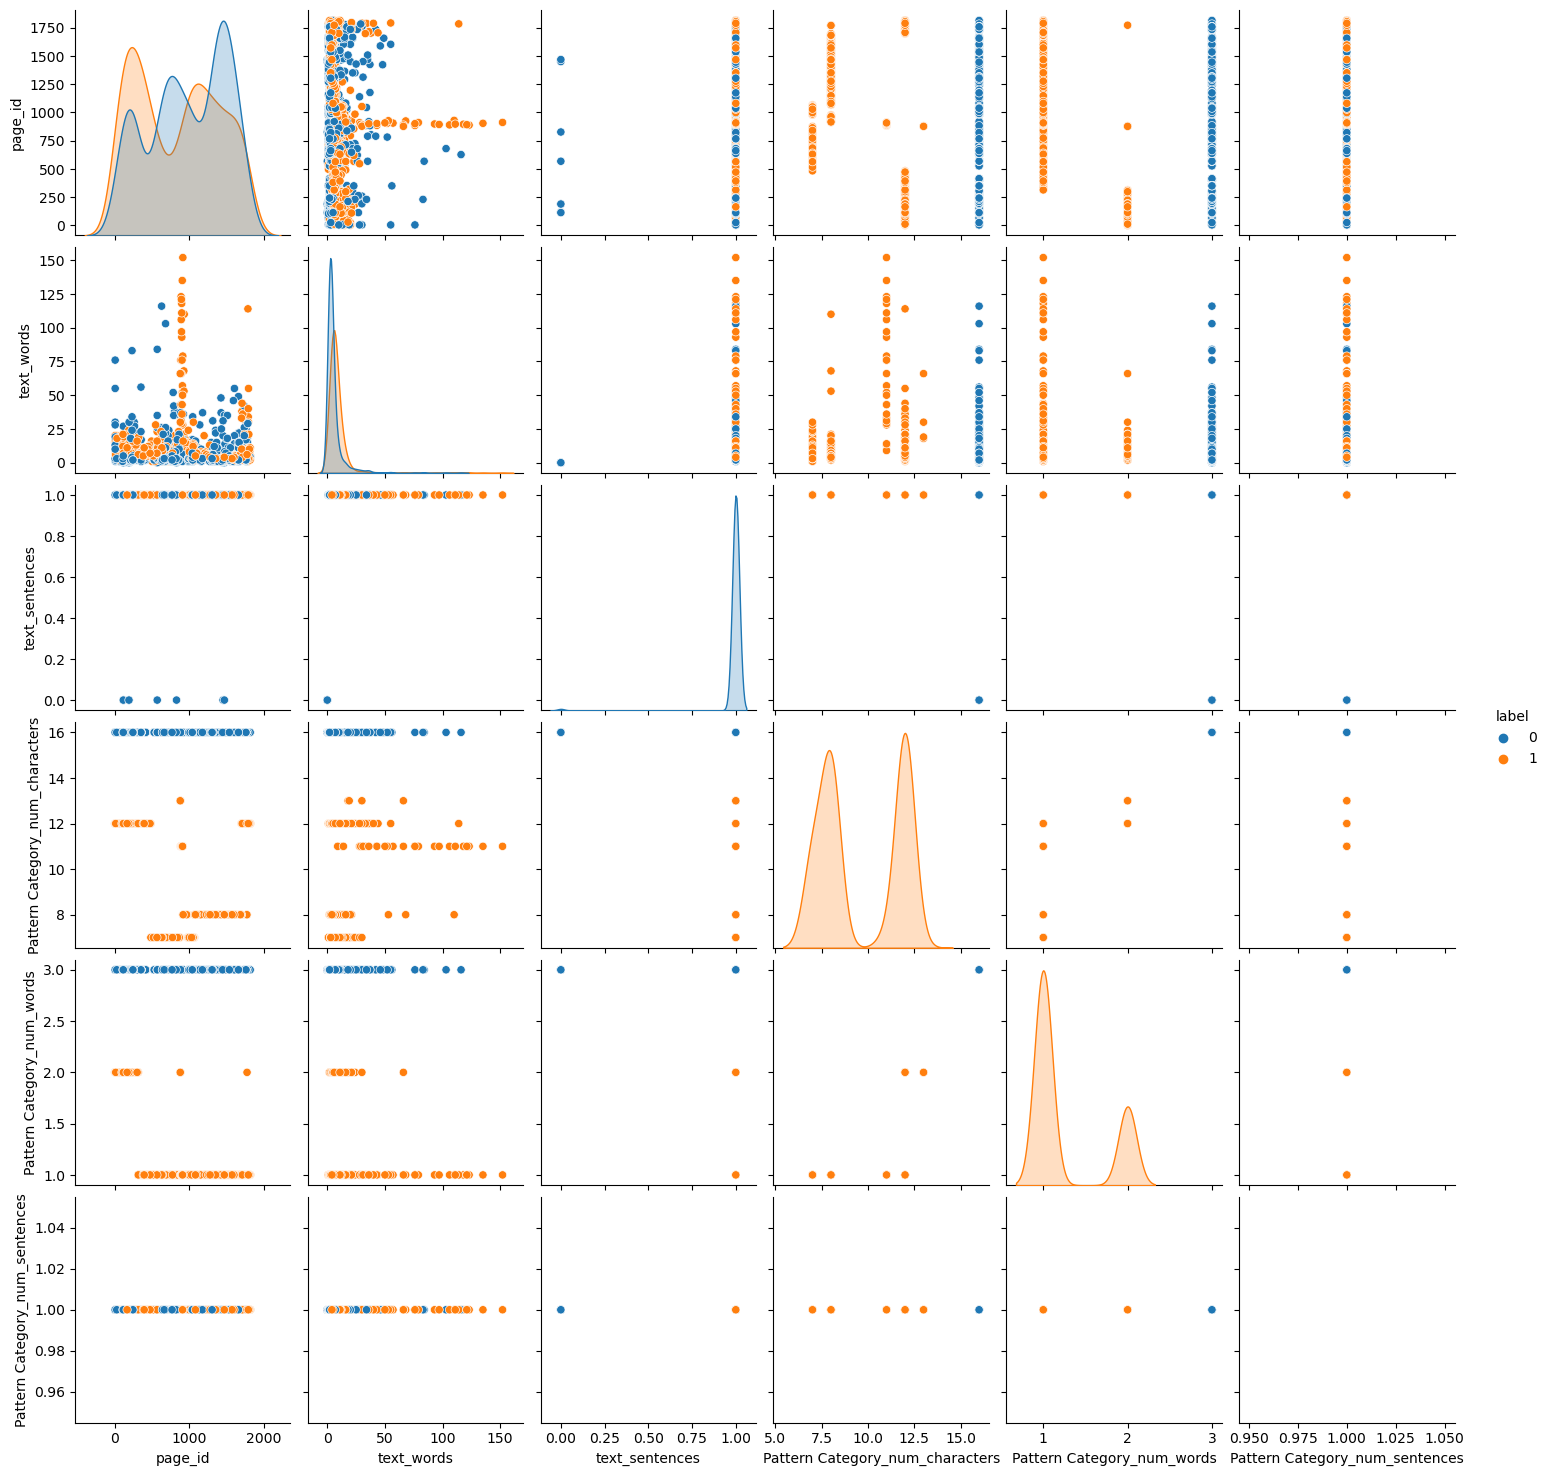

In [20]:
sns.pairplot(df,hue = 'label')

In [21]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['LemmatizedText'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df

,page_id,text,label,Pattern Category,text_words,text_sentences,Pattern Category_num_characters,Pattern Category_num_words,Pattern Category_num_sentences,LemmatizedText
0,1012,flash sale limited time only shop now,1,urgency,7,1,7,1,1,flash sale limited time only shop now
1,158,pillowcases shams,0,not dark pattern,2,1,16,3,1,pillowcase sham
2,108,write a review,0,not dark pattern,3,1,16,3,1,write a review
3,1425,to start your return simply click on the follo...,0,not dark pattern,37,1,16,3,1,to start your return simply click on the follo...
4,1658,newsletter signup privacy policy,0,not dark pattern,4,1,16,3,1,newsletter signup privacy policy
...,...,...,...,...,...,...,...,...,...,...
2351,1304,bra panty set,0,not dark pattern,3,1,16,3,1,bra panty set
2352,1038,dressesfootwearhatshoodies sweatshirtsjerseys...,0,not dark pattern,7,1,16,3,1,dressesfootwearhatshoodies sweatshirtsjerseysp...
2353,1081,only 4 left in stock,1,scarcity,5,1,8,1,1,only 4 left in stock
2354,767,trending players,0,not dark pattern,2,1,16,3,1,trending player


In [23]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500, min_font_size = 10,)

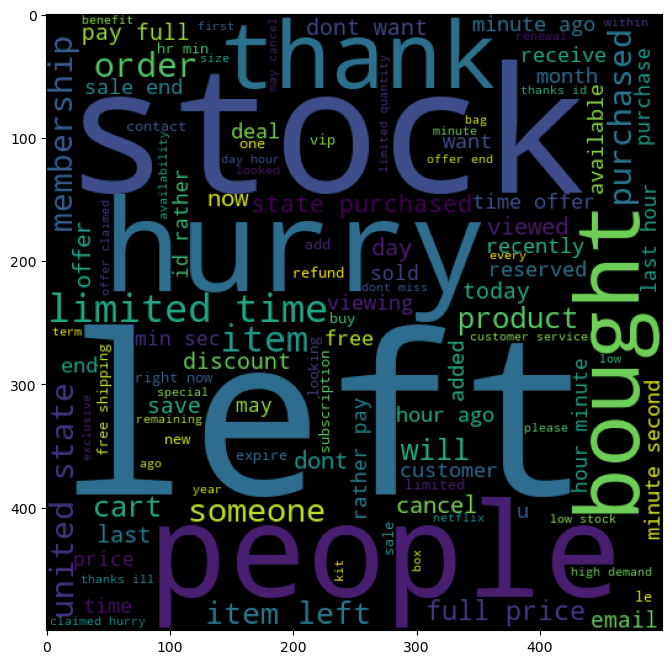

In [24]:
no_wc = wc.generate(df[df['label'] == 1]['LemmatizedText'].str.cat(sep = " "))
plt.figure(figsize = (12,8))
plt.imshow(no_wc)

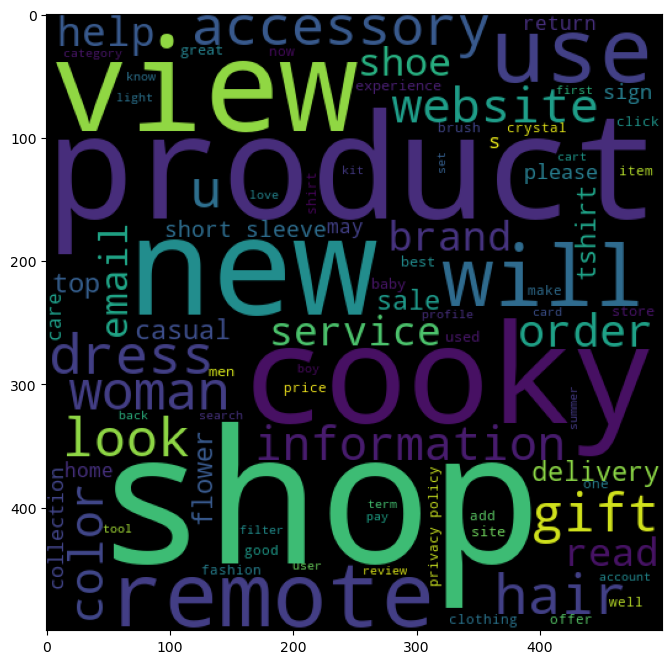

In [25]:
depend_wc = wc.generate(df[df['label'] == 0]['LemmatizedText'].str.cat(sep = " "))
plt.figure(figsize = (12,8))
plt.imshow(no_wc)

In [26]:
no_corpus = []
for msg in df[df['label'] == 1]['LemmatizedText'].tolist():
  for word in msg.split():
    no_corpus.append(word)

In [27]:
len(no_corpus)

10629

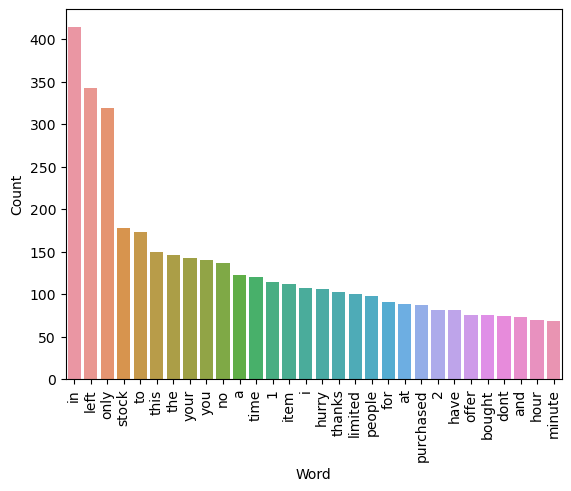

In [28]:
from collections import Counter

no_counter = Counter(no_corpus)#it gives the count of the words
most_common_words = no_counter.most_common(30)#most common 30 words are occured
df_most_common = pd.DataFrame(most_common_words, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', y = 'Count', data = df_most_common)
plt.xticks(rotation = 'vertical')# interpretable show of the data
plt.show()

In [29]:
depend_corpus = []
for msg in df[df['label'] == 0]['LemmatizedText'].tolist():
  for word in msg.split():
    depend_corpus.append(word)

len(depend_corpus)

6641

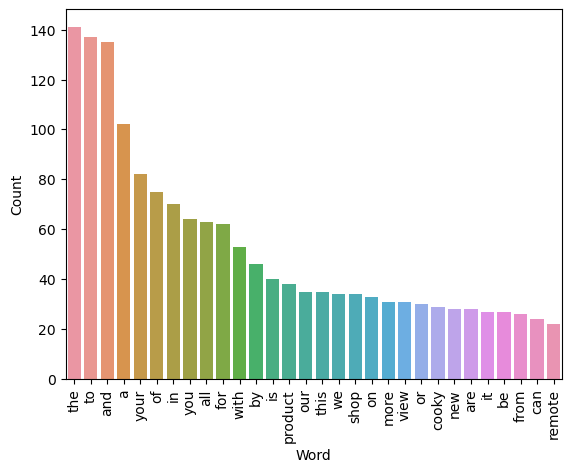

In [30]:
depend_counter = Counter(depend_corpus)#it gives the count of the words
most_common_words = depend_counter.most_common(30)#most common 30 words are occured
df_most_common = pd.DataFrame(most_common_words,columns = ['Word','Count'])

sns.barplot(x = 'Word', y = 'Count', data = df_most_common)
plt.xticks(rotation = 'vertical')# interpretable show of the data
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [32]:
cv = CountVectorizer(ngram_range=(1,2))

In [33]:
x = cv.fit_transform(df['LemmatizedText']).toarray()

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [35]:
x.shape

(2356, 12802)

In [36]:
y = df['label'].values
y

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,shuffle = True,random_state = None)

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [39]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [41]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='weighted'))

0.9015280135823429
[[278  29]
 [ 29 253]]
0.9015280135823429


In [42]:
mnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='weighted'))

0.9015280135823429
[[278  29]
 [ 29 253]]
0.9015280135823429


In [43]:
bnb.fit(x_train,y_train)
y_pred3 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='weighted'))

0.9015280135823429
[[278  29]
 [ 29 253]]
0.9015280135823429


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
lr = LogisticRegression(solver = 'liblinear',penalty = 'l1')
xgb = XGBClassifier(n_estimators = 50,random_state = 2)
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 4,max_features = 'sqrt',splitter = 'best')
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)

In [46]:
clfs = {
    'SVC' : svc,
    'LR' : lr,
    'NB' : mnb,
    'xgb' : xgb,
    'RF' : rfc,
    'KN' : knc,
    'DT' : dtc,
    'GBDT' : gbdt
}

In [47]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='weighted')

    return accuracy,precision

In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9168081494057725
Precision -  0.9177762025934946
For  LR
Accuracy -  0.9490662139219015
Precision -  0.9506284208151781
For  NB
Accuracy -  0.9202037351443124
Precision -  0.9209164996306388
For  xgb
Accuracy -  0.9507640067911715
Precision -  0.9515560405766185
For  RF
Accuracy -  0.9524617996604414
Precision -  0.9527422275963041
For  KN
Accuracy -  0.8149405772495756
Precision -  0.8634297048452397
For  DT
Accuracy -  0.5449915110356537
Precision -  0.7570650328486012
For  GBDT
Accuracy -  0.9100169779286927
Precision -  0.9122520178547344
